In [134]:
# instalasi
# !pip install pystan
# !pip install fbprophet

In [135]:
import warnings; 
warnings.simplefilter('ignore')
import pandas as pd
from fbprophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
# df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_air_passengers.csv') #percobaan 1 data penerbangan
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv') #percobaan 1 data retail

df.head(10)

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068
5,1992-06-01,168663
6,1992-07-01,169890
7,1992-08-01,170364
8,1992-09-01,164617
9,1992-10-01,173655


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      293 non-null    object
 1   y       293 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


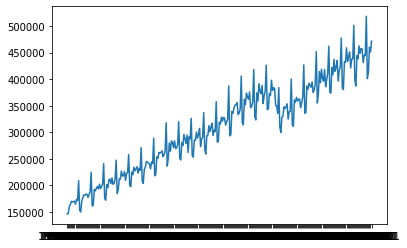

In [138]:
plt.plot(df['ds'],df['y'])
plt.show()

latih data

In [139]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [140]:
# # Python
# future = m.make_future_dataframe(periods=7)
# future.tail()

Forecasting

In [141]:

future = m.make_future_dataframe(periods=365*6,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,149329.305480,112557.394081,145156.553330,149329.305480,149329.305480,-20690.770023,-20690.770023,-20690.770023,13542.549512,13542.549512,13542.549512,-34233.319535,-34233.319535,-34233.319535,0.0,0.0,0.0,128638.535457
1,1992-02-01,150378.351687,116062.069598,149141.922511,150378.351687,150378.351687,-17012.040167,-17012.040167,-17012.040167,13542.549512,13542.549512,13542.549512,-30554.589679,-30554.589679,-30554.589679,0.0,0.0,0.0,133366.311520
2,1992-03-01,151359.717494,153729.785218,184868.675049,151359.717494,151359.717494,17933.023254,17933.023254,17933.023254,13542.549512,13542.549512,13542.549512,4390.473741,4390.473741,4390.473741,0.0,0.0,0.0,169292.740748
3,1992-04-01,152408.763702,146905.223691,179555.269345,152408.763702,152408.763702,10360.696745,10360.696745,10360.696745,13542.549512,13542.549512,13542.549512,-3181.852767,-3181.852767,-3181.852767,0.0,0.0,0.0,162769.460447
4,1992-05-01,153423.969709,163536.819630,195220.053574,153423.969709,153423.969709,25891.993336,25891.993336,25891.993336,13542.549512,13542.549512,13542.549512,12349.443824,12349.443824,12349.443824,0.0,0.0,0.0,179315.963045


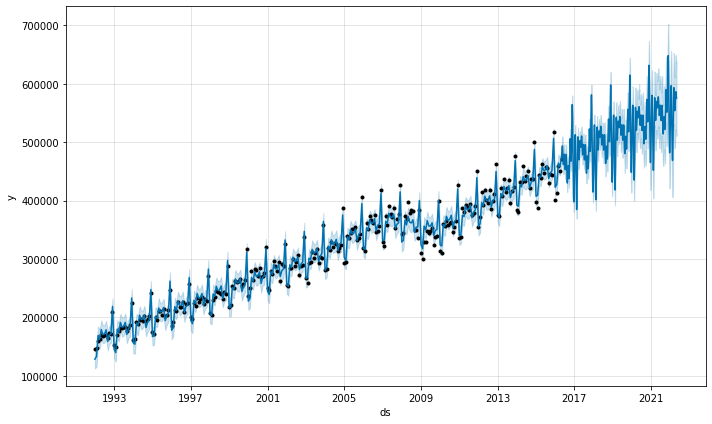

In [142]:
plot1 = m.plot(forecast)

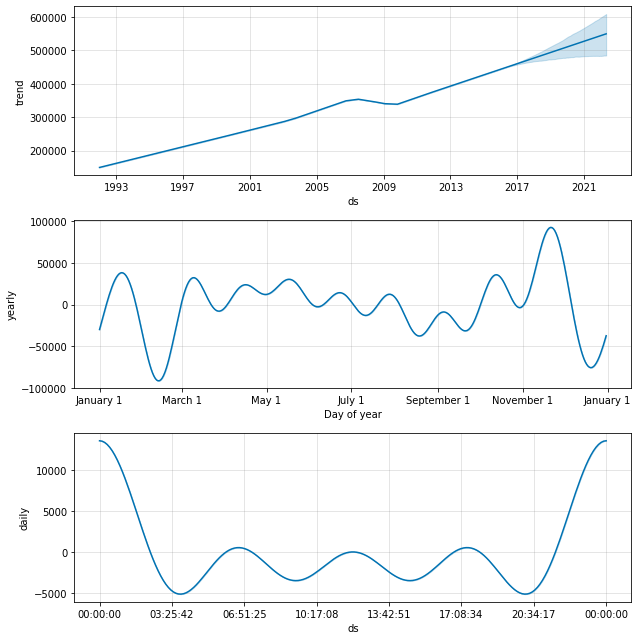

In [143]:
plt2 = m.plot_components(forecast)